Importações necessárias para a análise.

In [317]:
import pandas as pd
import numpy as np
import seaborn as sns 
import scipy.stats as stasts
import matplotlib.pyplot as plt
from IPython.display import display
import scipy.stats as stats
import pingouin as pg 
from scipy.stats import chi2_contingency
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score


In [318]:
df = pd.read_csv(r"E:\Analise Ifood\mkt_data.csv")
df.shape

(2205, 44)

In [319]:
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407


Aqui é possível ver que existem valores "0", mas é importante entender se eles representam valores nulos ou booleeanos.

In [320]:
df.info()
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

As colunas marital_Divorced,  marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD  possuem valores nulos, mas é importante entender se realmente esses valores são nulos ou se aoenas representam que as respostas representam valores booleanos, ou seja, as pessoas que responderam não se enquadram na situação da variável, mas para isso, é preciso verificar se existem apenas dois valores nessas colunas, pois assim conseguiremos entender a representatividade desses zeros.

In [321]:
df['marital_Divorced'].unique()


array([nan,  1.])

In [322]:
df['education_Basic'].unique()

array([nan,  2.])

Com isso, fica claro que essas colunas representam valores booleanos, onde os valores nulos representam não fez e o outro número, representa fez. Então vou criar colunas booleanas correspondentes às colunas que contém valores nulos onde serão representadas 0 = Não fez e 1 = Fez, para ficarem padronizadas.

In [323]:
nulos = ['marital_Divorced',  'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic',
          'education_Graduation', 'education_Master', 'education_PhD']

In [324]:
for item in nulos:
  df["booleano"+str(item)] = np.where(df[item].isnull(), 0, 1)

In [325]:
df

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,booleanomarital_Divorced,booleanomarital_Married,booleanomarital_Single,booleanomarital_Together,booleanomarital_Widow,booleanoeducation_2n Cycle,booleanoeducation_Basic,booleanoeducation_Graduation,booleanoeducation_Master,booleanoeducation_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


Agora, podemos começar a nossa análise, e decide iniciar com a renda dos clientes.

Text(0.5, 1.0, 'Distribuição de Renda por Clientes')

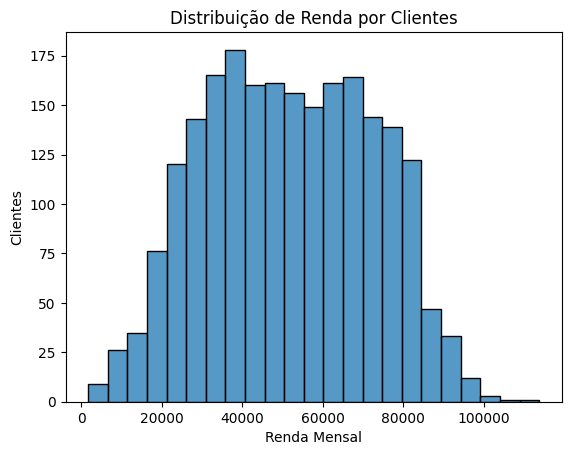

In [326]:
sns.histplot(df['Income'])
plt.xlabel('Renda Mensal')
plt.ylabel('Clientes')
plt.title('Distribuição de Renda por Clientes')

Text(0, 0.5, 'Renda Mensal')

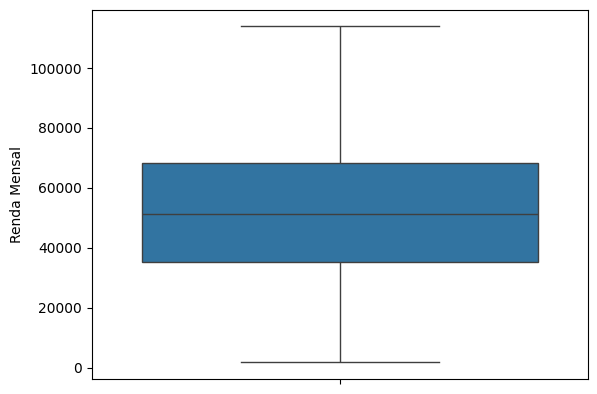

In [327]:
sns.boxplot(df['Income'])
plt.ylabel('Renda Mensal')

In [328]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

In [329]:
media = df['Income'].mean()
desvio = df['Income'].std()
cv = (desvio / media) * 100 
cv

40.12441554786958

Tanto no histograma como no boxplot vemos que as rendas dos clientes aparentam ser bem distribuidas e não apresentam outliers, isso indica que não tem pessoas ganhando valores extremos, tanto baixo como alto. 50% dos nossos clientes têm uma renda entre $35,000 e $68,000. Observamos também que o desvio padrão é de $20,713 e o nosso coeficiente de variação é de 40%, indicando que há uma variabilidade significativa na renda dos clientes.


Feito isso, agora é importante saber como estão os gastos desses nossos clientes e identificar se existe alguma relação entre ganhar mais e gastar mais.

Text(0, 0.5, 'Gastos')

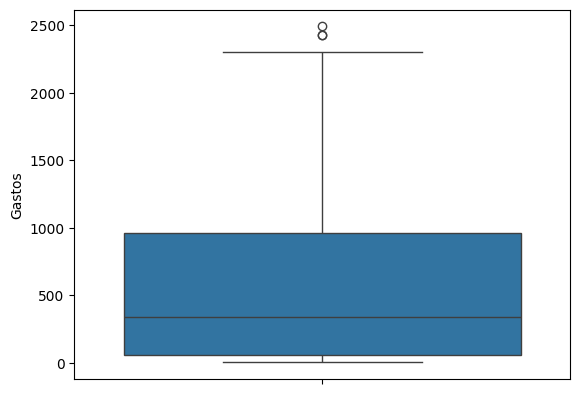

In [330]:
sns.boxplot(df['expenses'])
plt.ylabel('Gastos')

In [331]:
df['expenses'].describe()


count    2205.000000
mean      562.764626
std       575.936911
min         4.000000
25%        56.000000
50%       343.000000
75%       964.000000
max      2491.000000
Name: expenses, dtype: float64

In [332]:
df['expenses'].median()

343.0

Aqui analisamos os gastos dos clientes, a média de gastos é de $562.7, porém os dados não estão bem distribuídos, contando com a presença de outliers, de fato, isso elevou a média de gastos, não sendo a melhor medida representativa. Vemos no Box Plot que 50% dos nossos dados estão distribuídos entre $50 e $964, com desvio padrão de $575, sendo maior que a média, por esse motivo, calculamos a mediana, pois representaria melhor a quantidade gasta por clientes, e tivemos o resultado de $343. Ainda assim, é importante ressaltarmos que temos outliers, ou seja, algumas pessoas estão gastando valores bem maiores, sendo a máxima de $2491. Sabendo disso, queremos descobrir qual o motivo desses gastos tão altos e qual o padrão desses clientes.


In [333]:
df_decres = df.sort_values(by='expenses', ascending=False)
len(df_decres)

2205

In [334]:
top_10_por_cento = int(0.1*2205)
top_clientes_gastos = df_decres.head(top_10_por_cento)

Decidi separar 10% dos clientes que mais gastaram para entender as motivações, compras e perfil dos mesmos, a primeira análise que eu realizei foi sobre o salário, para entender se esses clientes recebem salários maiores que a nossa média de clientes.

Text(0.5, 1.0, 'Renda dos top 10% dos clientes que mais gastaram')

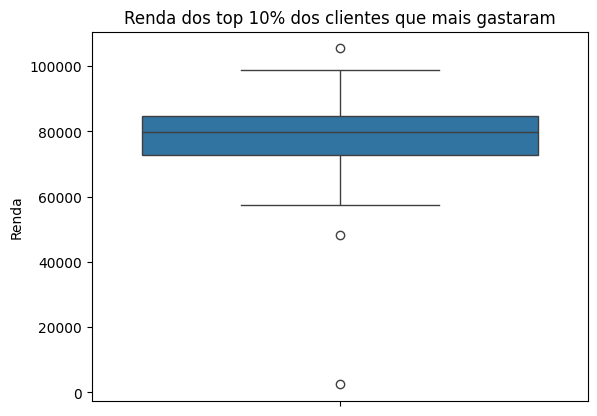

In [335]:
sns.boxplot(top_clientes_gastos['Income'])
plt.ylabel('Renda')
plt.title('Renda dos top 10% dos clientes que mais gastaram')

In [336]:
top_clientes_gastos['Income'].describe()


count       220.000000
mean      78857.468182
std       10447.850405
min        2447.000000
25%       72884.250000
50%       79703.500000
75%       84679.750000
max      105471.000000
Name: Income, dtype: float64

In [337]:
top_clientes_gastos['Income'].median()

79703.5

In [338]:
top_clientes_gastos['expenses'].describe()

count     220.000000
mean     1752.859091
std       221.252234
min      1468.000000
25%      1559.750000
50%      1698.500000
75%      1902.250000
max      2491.000000
Name: expenses, dtype: float64

Logo que plotei o BoxPlot tive uma surpresa, ficou nítido que em geral esses top 10% de gastos são de pessoas que recebem salário que são maiores que os outros em geral (já era esperado), porém me deparei com um outlier que me deixou intrigado, um desses clientes, recebe um salário de $2447, sendo que o mínimo gasto desses top 10% foi de $1468, ou seja, esse cliente em específico gastou no mínimo 60% do salário dele. 

Em relação ao salário desses top 10, fizemos a mesma coisa que já havíamos feito antes, consideramos a mediana ao invés da média, para que esse cliente que teve um atitude "incomum", não tenha influência no geral, e nossa mediana nos resultou em $79703,5. VeMos também que 50% desses top clientes recebem um sálario entre $72884 a $84679, com isso ja temos um indicativo de que as pessoas que gastaram mais geralmente ganham mais, mas será que quando analisarmos todos os clientes isso também será verdade? Pessoas com maiores salário gastam mais?

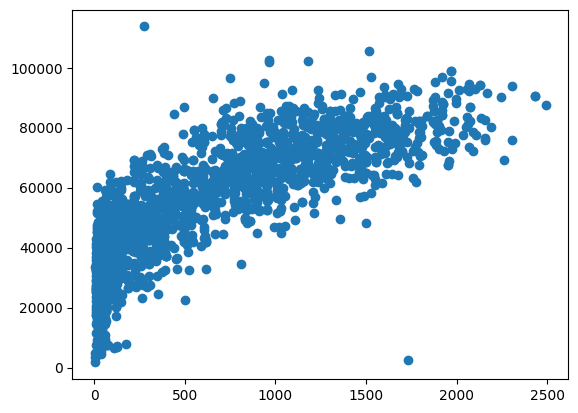

In [339]:
plt.scatter(df['expenses'], df['Income'])

Esse gráfico, indica que existe uma tendência entre pessoas gastaram mais possuem uma renda maior.

In [340]:
df['Income'].corr(df['expenses'])

0.8230660021398378

Essa é uma correlação diretamente proporcional alta, indicando que em geral, pessoas que possuem rendas maiores, gastaram mais. E pessoas que tem filhos gastam menos do que pessoas que não tem filhos? E a quantidade de filhos influencia nos gastos?

Como nossa amostra possui possui mais de 2000 registros, que é bem maior que 30, podemos pelo Teorema do Limite Central assumir uma homogeneidade.

In [341]:
df['expenses_sem_filhos'] = np.where(df['kids']==0, df['expenses'], np.NaN)
df['expenses_com_filhos'] = np.where(df['kids']!=0, df['expenses'], np.NaN)
expenses_sem_filhos = df['expenses_sem_filhos'].dropna()
expenses_com_filhos = df['expenses_com_filhos'].dropna()

In [342]:
df['expenses_sem_filhos'].mean()

1041.2070063694268

In [343]:
df['expenses_com_filhos'].mean()

372.23715916296766

Aparentemente a média de gastos de pessoas sem filhos é maior, mas será que essa diferença é estatisticamente significativa?

Não temos o desvio padrão populacional, mas temos o amostral e as médias amostrais, e como queremos comprovar as diferenças de médias, podemos usar o teste t. Porém temos que antes teste a homegeneidade das variâncias.

In [344]:
var_sem_filhos = np.var(df['expenses_sem_filhos'])
var_sem_filhos

390920.68007829925

In [345]:
var_com_filhos = np.var(df['expenses_com_filhos'])
var_com_filhos

180454.05662807424

In [346]:
stats.bartlett(expenses_com_filhos, expenses_sem_filhos)

BartlettResult(statistic=147.07410775194813, pvalue=7.560158983745347e-34)

Esse p-valor < 0.05, indica que com 95% de certeza as variâncias não são homogêneas, por isso não usaremos o Teste T de Student, mas sim o Teste T de Welch e pra isso vamos às nossas hipóteses:

H0: As médias de gastos de pessoas com filhos e sem são iguais.
Ha: As médias de gastos de pessoas com filhos e sem são diferentes.
95% de confiança

In [347]:
stats.ttest_ind(expenses_com_filhos, expenses_sem_filhos, equal_var=False)

TtestResult(statistic=-24.62546634148607, pvalue=6.198224475395983e-102, df=866.8121813751686)

Esse p-valor é muito baixo, devemos rejeitar H0 e podemos afirmar com 95% de certeza (ou até mesmo 99%) que as médias são estatisticamente diferentes, ou seja, provamos que a média de gastos sem filho é maior que com filho, mas voltando ao nosso questionamento, será que a quantidade de filhos também influencia? Será que existe diferença de gastos?

In [348]:
df.kids.value_counts()
df.groupby(['kids']).expenses.mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

Com isso precisamos escolher o teste mais adequado para prosseguir, por isso, primeiro vamos ver se as variâncias são iguais a 95% de confiança


In [349]:
df.groupby(['kids']).expenses.var()
um_filho = df[df['kids']==1].expenses.dropna()
dois_filhos = df[df['kids']==2].expenses.dropna()
tres_filhos = df[df['kids']==3].expenses.dropna()
stats.bartlett(um_filho, dois_filhos, tres_filhos)

BartlettResult(statistic=102.21719770243517, pvalue=6.365280420300725e-23)

Como as variâncias não são homogêneas também nesse caso, aqui não poderemos usar a ANOVA de 1 via, então teremos que usar a ANOVA de Welch e vamos às hipóteses:

H0: As médias de gastos por quantidade de filhos são iguais.

Ha: As média de gastos por quantidade de filho são diferentes.

95% de confiança.

In [350]:
pg.welch_anova(dv='expenses', between='kids', data=df)

,Source,ddof1,ddof2,F,p-unc,np2
0,kids,3,230.577429,273.379095,1.243061e-75,0.29497


Nosso p-valor < 0.05, com isso, concluímos com 95% de confiança que as médias são diferentes. Agora iremos utilizar o teste Post Hoc para descobrir quais são as médias diferentes. Como o tamanho das amostras de todos os grupos e as variâncias não são iguais, Não podemos usar Tukey, por isso usaremos Games Howell.

In [351]:
pg.pairwise_gameshowell(dv='expenses', between='kids', data= df)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,0,1,1041.207006,434.530576,606.676431,28.420029,21.346791,1002.850081,0.000000e+00,1.162312
1,0,2,1041.207006,221.568675,819.638332,28.748768,28.510381,949.356603,1.774136e-13,1.578202
2,0,3,1041.207006,237.380000,803.827006,60.565629,13.272000,70.890192,0.000000e+00,1.312592
3,1,2,434.530576,221.568675,212.961901,19.678256,10.822194,1152.588538,0.000000e+00,0.513077
4,1,3,434.530576,237.380000,197.150576,56.823741,3.469511,55.099957,5.475883e-03,0.437688
5,2,3,221.568675,237.380000,-15.811325,56.988869,-0.277446,55.722906,9.924585e-01,-0.052201


Apenas quando p-valor for maior que 5e-02 aceitamos H0 (médias iguais), lembrando que já comparamos a média de pessoas que não tem filhos com pessoas que tem filhos, então aqui olharemos apenas para pessoas que possuem filhos. Logo, podemos concluir que:

Pessoas com 1 filho têm médias de gastos significativamente diferentes de pessoas com 2 ou 3 filhos.

Pessoas com 2 filhos e 3 filhos têm médias de gastos que não são significativamente diferentes entre si.

Entender as diferenças de gastos entre famílias com diferentes números de filhos oferece uma oportunidade excelente para o marketing criar estratégias mais eficazes, personalizadas e direcionadas. Ao adaptar as mensagens, produtos, canais e promoções às necessidades e comportamentos específicos de cada segmento, apode-se aumentar a relevância de suas campanhas e melhorar os resultados de vendas e engajamento com os clientes. Falando em campanha, qual campanha teve maior aceitação?

In [352]:
campanhas = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
total_amostras = len(df)

proporcoes_aceitacao = [df[campanha].sum() / total_amostras * 100 for campanha in campanhas]

for i, proporcao in enumerate(proporcoes_aceitacao, start=1):
    print(f"Campanha {i} - Proporção de Aceitação: {proporcao:.2f}%")

Campanha 1 - Proporção de Aceitação: 6.44%
Campanha 2 - Proporção de Aceitação: 1.36%
Campanha 3 - Proporção de Aceitação: 7.39%
Campanha 4 - Proporção de Aceitação: 7.44%
Campanha 5 - Proporção de Aceitação: 7.30%


Vemos que a Campanha 4 teve maior aceitação, uma outra análise de extrema importância seria calcular os custos de cada campanha, pois assim, saberíamos qual campanha foi mais efetiva de fato, porém, como não temos essa variável, vou apenas analisar se há diferença significativa nas taxas de aceitação entre as campanhas 1, 3, 4 e 5. Decidi tirar a campanha 2 desse teste pois é perceptível ela não foi bem aceita e se tivéssemos os gastos olharíamos apenas para as outras campanhas para identificar qual foi a mais efetiva. Realizarei um teste Chi-quadrado pra porporções pois minhas variáveis são binárias e independentes.

In [353]:
campanhas_sem2 = ['AcceptedCmp1', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
aceitacoes = [df[campanha].sum() for campanha in campanhas_sem2]
nao_aceitacoes = [total_amostras - aceitacao for aceitacao in aceitacoes]
dados_chi2 = np.array([aceitacoes, nao_aceitacoes]) #matriz de contingência
chi2, p_value, _, _ = chi2_contingency(dados_chi2.T)
p_value

0.5275845603917897

Como p>0.05 não podemos dizer que existe uma diferença estatisticamente significativa nas taxas de aceitação entre as campanhas.

Com base na análise exploratória, decidimos criar um modelo de machine learning para prever as despesas dos clientes. O objetivo é utilizar as informações disponíveis para entender melhor os fatores que influenciam os gastos e, assim, prever as despesas futuras dos clientes.

Para construir um modelo de machine learning que preveja as despesas dos clientes, o primeiro passo é selecionar as features (variáveis independentes) e definir o target (variável dependente).

In [354]:
features = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days', 'kids']

target = ['expenses']

Agora irei separar os dados em treino e teste.

In [355]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A primeira coisa que irei fazer é definir os parâmetros.

In [356]:
param_distributions = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [100, 200, 300], 'subsample': [0.7, 0.8, 1.0], 
'colsample_bytree': [0.7, 0.8, 1.0]}

Em seguida, irei executar o modelo XGBoost e implementarei um Random Search (Busca Aleatória), uma técnica de otimização de hiperparâmetros que pode aumentar significativamente a precisão do modelo.

In [357]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_distributions, n_iter=20, scoring='neg_mean_squared_error', cv=2, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

Feito isso, é a hora de buscar os melhores hiperparâmetros.

In [358]:
best_params = random_search.best_params_
print(f"Melhores hiperparâmetros: {best_params}")

Melhores hiperparâmetros: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


O melhor hiperparâmetro que o modelo encontrou foi:

* subsample: 1.0 =  Usar todas as amostras (100%) para cada árvore. Isso garante que cada árvore seja treinada com o conjunto completo de dados, proporcionando um aprendizado mais robusto.

* n_estimators: 200 = Com 200 árvores, o modelo encontrou um bom equilíbrio entre desempenho e tempo de treinamento.

* max_depth: 3 = Árvores mais rasas (profundidade de 3) são menos propensas a overfitting e geralmente promovem melhor generalização. Isso indica que o modelo conseguiu capturar a complexidade necessária com árvores relativamente simples.

* learning_rate: 0.1 = Uma taxa de aprendizado de 0.1 é comum e fornece um bom equilíbrio entre a velocidade de treinamento e a capacidade de ajuste fino do modelo.

* colsample_bytree: 0.8 = Usar 80% das features para cada árvore ajuda a reduzir a correlação entre as árvores e promove melhor generalização, também contribui para a robustez do modelo, tornando-o menos suscetível a overfitting em features específicas.

Essas configurações demonstraram ser eficazes, promovendo um bom equilíbrio entre desempenho, generalização e tempo de treinamento, resultando em um modelo otimizado e robusto.

In [359]:
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1126.330626181157


E quais são as Features mais influentes nas previsões do modelo?

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

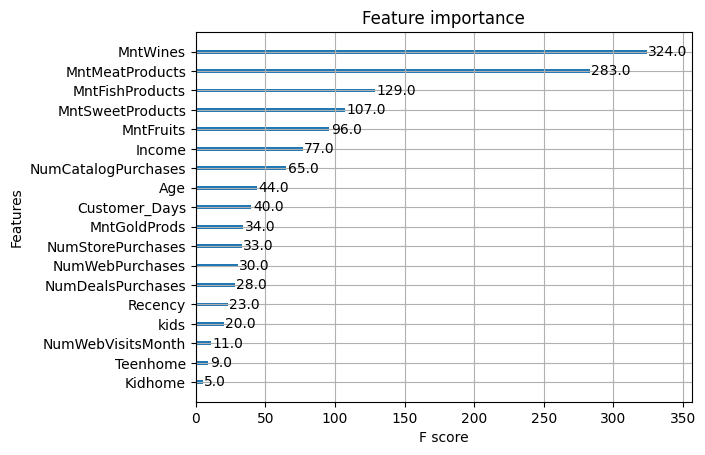

In [370]:
xgb.plot_importance(best_xgb_model)

As variáveis relacionadas aos diferentes tipos de gastos (vinhos, carne, peixe, doces, frutas) são as mais importantes, indicando que esses gastos específicos são muito influentes nas despesas totais dos clientes, os gastos também são fatores significativos como já havíamos visto anteriormente.

Além do MSE, considere avaliar o modelo usando outras métricas como Mean Absolute Error (MAE), R-squared (R²) e Root Mean Squared Error (RMSE) para uma análise mais completa.

In [371]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}', f'Root Mean Squared Error: {rmse}', f'R-squared: {r2}')

Mean Absolute Error: 21.350382162600148 Root Mean Squared Error: 33.5608496045788 R-squared: 0.9965859651565552


* O MAE é de 21.35, o que significa que, em média, as previsões do modelo estão a 21.35 unidades das despesas reais. Este é um bom valor, especialmente se as despesas forem 

* O RMSE é de 33.56, o que nos dá uma ideia da magnitude do erro típico. O RMSE é mais sensível a grandes erros do que o MAE, então um RMSE de 33.56 indica que grandes erros são raros, mas presentes.

* O R² é de 0.997, o que indica que o modelo explica cerca de 99.7% da variabilidade nos dados de despesas. Este é um valor extremamente alto e sugere que o modelo está capturando muito bem a relação entre as features e o target.

Com isso, criarei um gráfico para visualizar a relação entre os valores reais e os previstos das despesas.

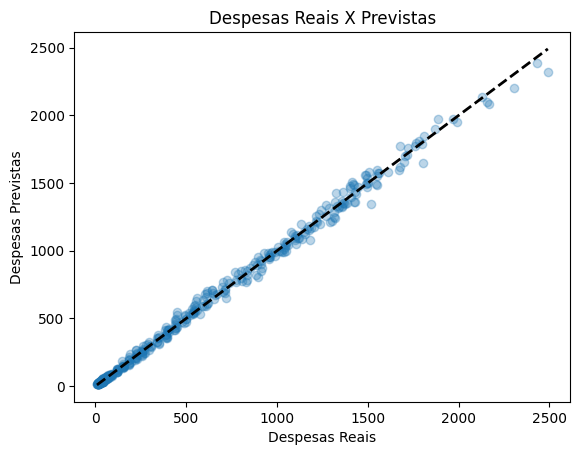

In [372]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Despesas Reais')
plt.ylabel('Despesas Previstas')
plt.title('Despesas Reais X Previstas')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

O gráfico mostra uma forte correlação linear, indicando que o modelo está prevendo muito bem as despesas dos clientes. A linha tracejada preta representa a linha de perfeição (onde as previsões são exatamente iguais aos valores reais), e a proximidade dos pontos a esta linha confirma a boa performance do modelo.

Por fim, irei realizar uma validação cruzada (procedimento que ajuda a garantir a robustez e capacidade de generalização do modelo)

In [374]:
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_rmse = np.sqrt(cv_mse)

print(f'Cross-Validated Mean Squared Error: {cv_mse}', f'Cross-Validated Root Mean Squared Error: {cv_rmse}')


Cross-Validated Mean Squared Error: 1363.8286179069435 Cross-Validated Root Mean Squared Error: 36.93005033718399


Esses resultados indicam que, em média, o erro quadrático das previsões do seu modelo em diferentes subconjuntos dos dados é de 1363.83, e o erro típico (RMSE) é de 36.93 unidades.